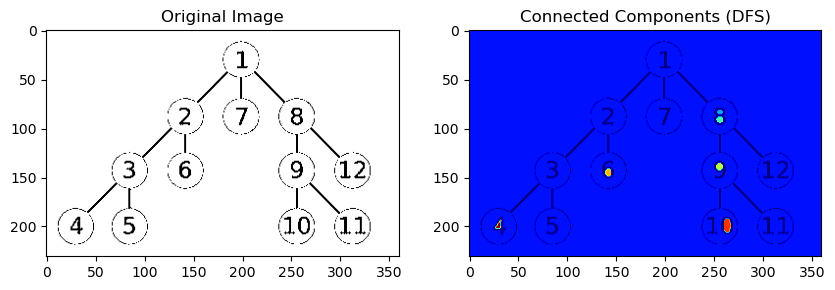

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to perform Depth First Search (DFS)
def dfs(image, x, y, visited):
    rows, cols = image.shape
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    stack = [(x, y)]
    visited[x][y] = True
    component = [(x, y)]
    
    while stack:
        cur_x, cur_y = stack.pop()
        for direction in directions:
            new_x, new_y = cur_x + direction[0], cur_y + direction[1]
            if 0 <= new_x < rows and 0 <= new_y < cols and not visited[new_x][new_y]:
                if image[new_x, new_y] == 255:
                    visited[new_x][new_y] = True
                    stack.append((new_x, new_y))
                    component.append((new_x, new_y))
                    
    return component

# Path to the image
image_path = r"C:\Users\Mega Computers\Downloads\dfs.png"

# Check if file exists
if not os.path.exists(image_path):
    print(f"Error: File '{image_path}' does not exist.")
    exit()

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded properly
if image is None:
    print("Error: Image not found or failed to load.")
    exit()

# Threshold the image to binary (0 or 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Get the dimensions of the image
rows, cols = binary_image.shape

# Create a visited array to keep track of visited pixels
visited = np.zeros((rows, cols), dtype=bool)

# List to store all the connected components
components = []

# Perform DFS on each unvisited pixel
for i in range(rows):
    for j in range(cols):
        if binary_image[i, j] == 255 and not visited[i, j]:
            component = dfs(binary_image, i, j, visited)
            components.append(component)

# Visualize the result using matplotlib
output_image = np.zeros_like(binary_image)

for idx, component in enumerate(components):
    color_value = (idx + 1) * (255 // len(components))  # Assign unique color for each component
    for (x, y) in component:
        output_image[x, y] = color_value

# Plot the original and connected components
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Connected Components (DFS)")
plt.imshow(output_image, cmap='jet')  # Using jet color map to distinguish components

plt.show()
